In [30]:
#IMPORT
import cv2 as cv
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import pickle
from keras_facenet import FaceNet
import matplotlib.pyplot as plt

1/1 [==============================] - 2s 2s/step


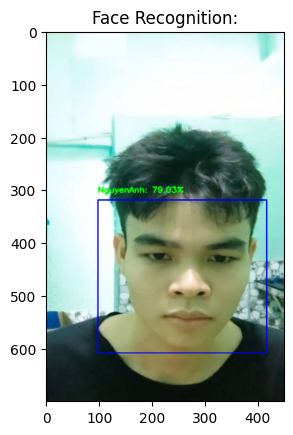

In [31]:
#INITIALIZE
facenet = FaceNet()
current_path = os.getcwd().replace("\\", "/")
faces_embeddings = np.load(current_path + "/faces_embeddings_done_4classes.npz")
Y = faces_embeddings['arr_1']
encoder = LabelEncoder()
encoder.fit(Y)
haarcascade = cv.CascadeClassifier(current_path + "/haarcascade_frontalface_default.xml")
model = pickle.load(open(current_path + "/svm_model_160x160.pkl", 'rb'))

# Load image
img = cv.imread("E:/BKDN/ky6/PBL5/src/z_face_recognition/NguyenAnh_test.jpg")

rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = haarcascade.detectMultiScale(gray_img, 1.3, 5)

for x,y,w,h in faces:
    img_face = rgb_img[y:y+h, x:x+w]
    img_face = cv.resize(img_face, (160,160)) # 1x160x160x3
    img_face = np.expand_dims(img_face,axis=0)
    ypred = facenet.embeddings(img_face)
    face_prob = model.predict_proba(ypred)
    max_prob = np.max(face_prob)
    
    if max_prob < 0.75:
        final_name = "unknown"
        text = "{}: {:.2f}%".format(final_name, max_prob*100)
    else:
        face_name = model.predict(ypred)
        final_name = encoder.inverse_transform(face_name)[0]
        text = "{}: {:.2f}%".format(final_name, max_prob*100)
    
    cv.rectangle(rgb_img, (x,y), (x+w,y+h), (0,0,255), 3)
    cv.putText(rgb_img, text, (x,y-30), cv.FONT_HERSHEY_SIMPLEX,
            1, (0,255,0), 3)

if img is not None and len(img.shape) > 0 and img.shape[0] > 0 and img.shape[1] > 0:
    # print("Image shape:", img.shape)
    
    rgb_img = cv.cvtColor(rgb_img, cv.COLOR_BGR2RGB)
    img_resized = cv.resize(rgb_img, (450, 700)) # Resize image for display
    plt.imshow(img_resized[...,::-1])
    plt.title("Face Recognition:")
    plt.show()
else:
    print("Invalid image shape")
